In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib import cm
import folium
%matplotlib inline

In [4]:
#빅데이터 그래프 한글 폰트 사용하기.

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
font_location = "c:/Windows/fonts/malgunbd.ttf"
font_name =font_manager.FontProperties(fname=font_location).get_name()
plt.rc('font', family = font_name)

In [5]:
# 2016년도 사망교통사고 읽기

accident_2016=pd.read_csv('accident_2016.csv',quotechar=',',encoding='CP949')
accident_2016.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2016,2016122320,35,야간,금,1,1,0,0,0,...,교차로,교차로내,승용차,중형,보행자,보행자,981731.0,1932086.0,127.293623,37.387686
1,2016,2016122517,48,주간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,중형,보행자,보행자,945989.0,1942347.0,126.889123,37.478777
2,2016,2016122519,5,야간,일,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,보행자,보행자,993981.0,1879534.0,127.431592,36.915926
3,2016,2016122610,40,주간,월,1,1,0,0,0,...,단일로,기타단일로,승합차,경형,보행자,보행자,1161153.0,1751026.0,129.282183,35.742393
4,2016,2016122819,40,야간,수,1,1,0,0,0,...,단일로,기타단일로,승용차,소형,보행자,보행자,1056276.0,1686645.0,128.118016,35.173512


In [6]:
#2012년 ~ 2016년 사망사고 읽기

accident_2012_2016=pd.read_csv('12_16_death.csv',quotechar='"',encoding='CP949')
accident_2012_2016.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012050901,10,야간,수,1,1,0,0,0,...,단일로,기타단일로,승용차,대형,화물차,대형,1032000,1731688,127.853191,35.580719
1,2012,2012033013,32,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,특수차,경형,960392,1924378,127.052936,37.317615
2,2012,2012102620,55,야간,금,1,2,1,0,0,...,단일로,기타단일로,승용차,중형,승용차,소형,1045245,1799427,128.003224,36.190921
3,2012,2012062814,10,주간,목,1,1,0,0,0,...,단일로,기타단일로,화물차,대형,승용차,소형,992942,1915569,127.420426,37.238956
4,2012,2012061804,15,야간,월,1,1,0,0,0,...,기타/불명,기타/불명,화물차,대형,화물차,대형,1013547,1663287,127.648393,34.964371


In [7]:
#2016에 전체 교통사고 읽기 (전체 교통사고라는 것은 사망사고를 포함한 모든 교통사고를 말함)

all_accident_2016=pd.read_excel('all_accident_2016.xls',encoding='utf-8')
all_accident_2016.head()

,시도,시군구,기준년도,2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,...,2016.8,2016.9,2016.10,2016.11,2016.12,2016.13,2016.14,2016.15,2016.16,2016.17
0,시도,시군구,기준년도,합계,단일로,단일로,단일로,단일로,단일로,단일로,...,교차로,교차로,건널목,건널목,기타/불명,기타/불명,고가도로위,고가도로위,지하도로내,지하도로내
1,시도,시군구,기준년도,합계,합계,횡단보도상,횡단보도부근,터널안,교량위,기타단일로,...,교차로내,교차로부근,합계,건널목,합계,기타/불명,합계,고가도로위,합계,지하도로내
2,합계,합계,발생건수,220917,115543,6009,1744,535,1219,106036,...,64488,34761,6,6,5526,5526,366,366,227,227
3,합계,합계,사망자수,4292,2823,172,38,27,50,2536,...,851,485,0,0,106,106,14,14,13,13
4,합계,합계,부상자수,331720,169561,6377,2251,1224,2244,157465,...,101406,52368,8,8,7366,7366,639,639,372,372


In [8]:
#2016년 날씨 데이터 읽기.
weather_2016=pd.read_csv('2016_weather.csv',quotechar='"',encoding='CP949')
weather_2016.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,지점,일시,기온(°C),강수량(mm),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m)
0,90,2016-01-01 00:00,-1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0
1,90,2016-01-01 01:00,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0
2,90,2016-01-01 02:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0
3,90,2016-01-01 03:00,-0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0
4,90,2016-01-01 04:00,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0


In [7]:
#교통사고, 사망교통사고, 날씨 데이터를 읽어오는 과정

In [9]:
#2016년 교통사고 columns 에서 발생년월일시를 일시로 바꿈. --> 데이터 병합을 위함임.
accident_2016.columns=['발생년', '일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
      '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도']
accident_2016.head()

,발생년,일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2016,2016122320,35,야간,금,1,1,0,0,0,...,교차로,교차로내,승용차,중형,보행자,보행자,981731.0,1932086.0,127.293623,37.387686
1,2016,2016122517,48,주간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,중형,보행자,보행자,945989.0,1942347.0,126.889123,37.478777
2,2016,2016122519,5,야간,일,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,보행자,보행자,993981.0,1879534.0,127.431592,36.915926
3,2016,2016122610,40,주간,월,1,1,0,0,0,...,단일로,기타단일로,승합차,경형,보행자,보행자,1161153.0,1751026.0,129.282183,35.742393
4,2016,2016122819,40,야간,수,1,1,0,0,0,...,단일로,기타단일로,승용차,소형,보행자,보행자,1056276.0,1686645.0,128.118016,35.173512


In [10]:
# 날씨 데이터와 교통사고 데이터를 병합하기 위한 과정

accident_2016['datetime'] = accident_2016['일시'].apply(lambda x: pd.to_datetime(str(x), format="%Y%m%d%H"))
#pd.to_datetime(accident_2016['일시'], format="%Y%m%d%H")
accident_2016.datetime.head()

weather_2016=pd.read_csv('2016_weather.csv',quotechar='"',encoding='CP949')

weather_2016.head()

weather_2016['datetime'] = weather_2016['일시'].apply(lambda x: pd.to_datetime(str(x), format="%Y-%m-%d %H:%M"))

weather_2016.head()

accident_2016.loc[:,['발생지시도','사상자수','datetime']]

key_column=pd.read_csv('weather_merge_key.csv',quotechar='"',encoding='CP949')

key_column.head()

weather_location_2016 = pd.merge(weather_2016,key_column,how='left', on='지점')

weather_location_2016.head()

weather_location_temp_2016=weather_location_2016.loc[:,['발생지시도','datetime','강수량(mm)','적설(cm)','전운량(10분위)','시정(10m)']]



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
# 날씨 데이터와 교통사고 데이터를 병합하기 위한 과정
weather_location_sort_2016=weather_location_temp_2016.groupby(['발생지시도','datetime']).mean()

weather_location_sort_2016.reset_index(inplace=True)

weather_location_sort_2016

weather_casualty_2016 = pd.merge(accident_2016,weather_location_sort_2016,how='left', on=['발생지시도','datetime'])

combined_2016=weather_casualty_2016.loc[:,['datetime','시정(10m)','강수량(mm)','적설(cm)','도로형태','사상자수']]

combined_2016.head()

,datetime,시정(10m),강수량(mm),적설(cm),도로형태,사상자수
0,2016-12-23 20:00:00,1142.000000,NaN,NaN,교차로내,1
1,2016-12-25 17:00:00,1112.000000,NaN,NaN,기타단일로,1
2,2016-12-25 19:00:00,536.250000,NaN,NaN,기타단일로,1
3,2016-12-26 10:00:00,1022.333333,NaN,NaN,기타단일로,1
4,2016-12-28 19:00:00,1997.000000,NaN,NaN,기타단일로,1


In [12]:
# 날씨 데이터와 교통사고 데이터를 병합한 후 잘못 추출된 데이터를 제외함.
cg1_2016_t=combined_2016.groupby('시정(10m)').count()

cg1_2016=cg1_2016_t.iloc[:,[4]] #시정거리별 사건수
cg1_2016=cg1_2016[cg1_2016['사상자수']!=657]

cg2_2016_t=combined_2016.groupby('강수량(mm)').count()
cg2_2016=cg2_2016_t.iloc[:,[4]] #강수량
cg2_2016=cg2_2016[cg2_2016['사상자수']!=172]

cg3_2016_t=combined_2016.groupby('적설(cm)').count()
cg3_2016=cg3_2016_t.iloc[:,[4]] #강수량

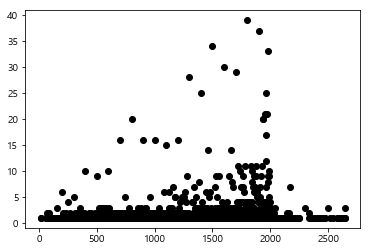

In [13]:
#2016년 시정거리에 따른 교통사고 사망자수.
plt.plot(cg1_2016, 'k.', label='Default', marker ='o')


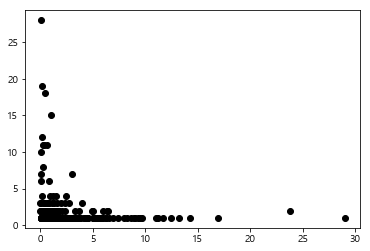

In [13]:
#2016년 강수량에 따른 교통사고 사망자수.
plt.plot(cg2_2016, 'k.', label='Default', marker ='o')

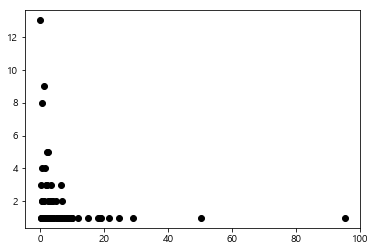

In [14]:
#2016년 적설량에 따른 교통사고 사망자수.
plt.plot(cg3_2016, 'k.', label='Default', marker ='o')

In [15]:
#2015~2012년도 columns 발생년월일시를 일시로 바꿈
accident_2015=accident_2012_2016[accident_2012_2016['발생년']==2015]
accident_2014=accident_2012_2016[accident_2012_2016['발생년']==2014]
accident_2013=accident_2012_2016[accident_2012_2016['발생년']==2013]
accident_2012=accident_2012_2016[accident_2012_2016['발생년']==2012]
accident_2015.columns=['발생년', '일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도']
accident_2014.columns=['발생년', '일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도']
accident_2013.columns=['발생년', '일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도']
accident_2012.columns=['발생년', '일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도']

In [16]:
#날씨데이터와 2015 교통사고 데이터를 병합
accident_2015['datetime'] = accident_2015['일시'].apply(lambda x: pd.to_datetime(str(x), format="%Y%m%d%H"))
accident_2015.head()

weather_2015=pd.read_csv('2015_weather.csv',quotechar='"',encoding='CP949')
weather_2015.head()

weather_2015['datetime'] = weather_2015['일시'].apply(lambda x: pd.to_datetime(str(x), format="%Y-%m-%d %H:%M"))
weather_2015.head()

weather_location_2015 = pd.merge(weather_2015,key_column,how='left', on='지점')
weather_location_2015.head()

weather_location_temp_2015=weather_location_2015.loc[:,['발생지시도','datetime','강수량(mm)','적설(cm)','전운량(10분위)','시정(10m)']]
weather_location_sort_2015=weather_location_temp_2015.groupby(['발생지시도','datetime']).mean()
weather_location_sort_2015.reset_index(inplace=True)
weather_location_sort_2015

weather_casualty_2015 = pd.merge(accident_2015,weather_location_sort_2015,how='left', on=['발생지시도','datetime'])
combined_2015=weather_casualty_2015.loc[:,['datetime','시정(10m)','강수량(mm)','적설(cm)','도로형태','사상자수']]
combined_2015







C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,시정(10m),강수량(mm),적설(cm),도로형태,사상자수
0,2015-05-20 08:00:00,2000.000000,NaN,NaN,교차로내,1
1,2015-05-19 20:00:00,556.000000,0.000000,NaN,교차로내,1
2,2015-05-20 10:00:00,1866.666667,NaN,NaN,기타단일로,1
3,2015-05-17 18:00:00,1760.000000,NaN,NaN,교차로내,1
4,2015-05-17 13:00:00,2000.000000,NaN,NaN,기타단일로,1
5,2015-05-17 18:00:00,1811.111111,NaN,NaN,기타단일로,4
6,2015-04-05 00:00:00,1542.857143,0.525000,NaN,기타단일로,1
7,2015-04-11 04:00:00,1300.000000,NaN,NaN,기타단일로,2
8,2015-04-10 02:00:00,1933.333333,NaN,NaN,기타단일로,2
9,2015-04-12 22:00:00,1966.666667,NaN,NaN,기타단일로,1


In [17]:
#병합된 데이터 값에서 튀는 값들 제외
cg1_2015_t=combined_2015.groupby('시정(10m)').count()

cg1_2015=cg1_2015_t.iloc[:,[4]] #시정거리별 사건수
cg1_2015=cg1_2015[cg1_2015['사상자수']!=771]

cg2_2015_t=combined_2015.groupby('강수량(mm)').count()
cg2_2015=cg2_2015_t.iloc[:,[4]] #강수량
cg2_2015=cg2_2015[cg2_2015['사상자수']!=189]

cg3_2015_t=combined_2015.groupby('적설(cm)').count()
cg3_2015=cg3_2015_t.iloc[:,[4]] #강수량

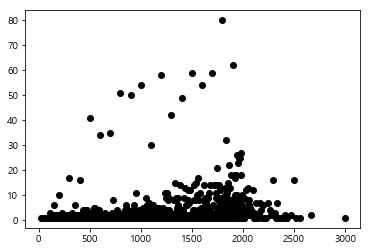

In [18]:
# 2015년 사망교통사고의 수와 시정거리의 그래프
plt.plot(cg1_2015, 'k.', label='Default', marker ='o')

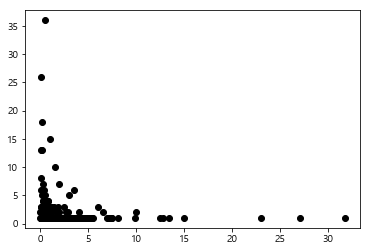

In [19]:
# 2015년 사망교통사고의 수와 강수량의 그래프
plt.plot(cg2_2015, 'k.', label='Default', marker ='o')

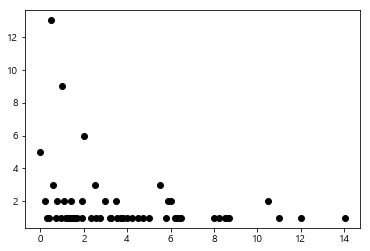

In [20]:
# 2015년 사망교통사고의 수와 적설량의 그래프
plt.plot(cg3_2015, 'k.', label='Default', marker ='o')

In [21]:
#연도별 교통사고수, 사망교통사고수 데이터 표로 작성
from pandas import DataFrame
data={
'year' : ['2012','2013','2014','2015','2016'],
'all' : [223656,215354,223552,232035,220917],
'death' : [5392,5092,4762,4621,4292]}

gid=DataFrame(data)
gid=gid.set_index(["year"])
gid

,all,death
year,,
2012,223656,5392
2013,215354,5092
2014,223552,4762
2015,232035,4621
2016,220917,4292


In [22]:
g1=gid.iloc[:,[0]]
g2=gid.iloc[:,[1]]

([<matplotlib.axis.XTick at 0x18f1450a550>,
 <a list of 5 Text xticklabel objects>)

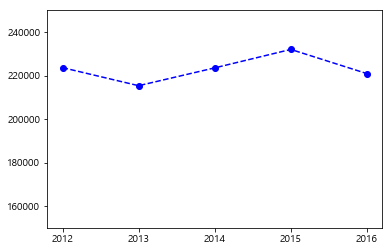

In [23]:
#연도별 교통사고수 그래프
plt.plot(g1,'k--', label='Default', marker = 'o', color='b')
plt.ylim([150000,250000])
plt.xticks([2012,2013,2014,2015,2016])

([<matplotlib.axis.XTick at 0x18f7f40fda0>,
 <a list of 5 Text xticklabel objects>)

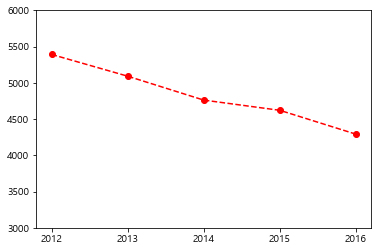

In [24]:
#연도별 사망교통사고수 그래프
plt.plot(g2,'k--', label='Default', marker = 'o',color='r')
plt.ylim([3000,6000])
plt.xticks([2012,2013,2014,2015,2016])

In [14]:
#2016년 전체교통사고애서 도시별 교통사고 수 

all_accident_2016_합계=all_accident_2016[all_accident_2016['시군구']=='합계']
all_accident_2016_합계_발생건수=all_accident_2016_합계[all_accident_2016_합계['기준년도']=='발생건수']
all_accident_2016_합계_발생건수_3 =all_accident_2016_합계_발생건수.iloc[:,[0,3]]
all_accident_2016_합계_발생건수_3

,시도,2016
2,합계,220917
8,서울,40039
164,부산,12192
266,대구,13098
320,인천,8535
386,광주,7354
422,대전,7535
458,울산,4496
494,세종,521
506,경기,51013


In [15]:
#2016년 사망교통사고에서 도시별 교통사고 수

all_accident_2016_합계_사망자수=all_accident_2016_합계[all_accident_2016_합계['기준년도']=='사망자수']
all_accident_2016_합계_사망자수_3=all_accident_2016_합계_사망자수.iloc[:,[0,3]]
all_accident_2016_합계_사망자수_3

,시도,2016
3,합계,4292
9,서울,348
165,부산,159
267,대구,164
321,인천,144
387,광주,85
423,대전,99
459,울산,81
495,세종,25
507,경기,780


In [16]:
#2016년 사망교통사고에서 경북에서 교통사고 읽기

K_accident_2016=accident_2016[accident_2016['발생지시도']=='경북']
K_accident_2016.head()

,발생년,일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,datetime
3,2016,2016122610,40,주간,월,1,1,0,0,0,...,기타단일로,승합차,경형,보행자,보행자,1161153.0,1751026.0,129.282183,35.742393,2016-12-26 10:00:00
14,2016,2016112700,25,야간,일,1,1,0,0,0,...,기타단일로,승용차,중형,보행자,보행자,1081074.0,1777503.0,128.399432,35.990944,2016-11-27 00:00:00
26,2016,2016102914,55,주간,토,1,1,0,0,0,...,교차로부근,화물차,중형,이륜차,소형,1121188.0,1765503.0,128.842534,35.878620,2016-10-29 14:00:00
36,2016,2016022817,35,주간,일,1,1,0,0,0,...,교차로내,이륜차,소형,승용차,중형,1121228.0,1755832.0,128.841508,35.791444,2016-02-28 17:00:00
38,2016,2016022713,40,주간,토,1,1,0,0,0,...,교차로부근,승용차,중형,보행자,보행자,1080782.0,1778031.0,128.396247,35.995728,2016-02-27 13:00:00


In [21]:
#2016년 사망교통사고에서 당사자종별_1당_대분류에서 화물차에 대해 읽기

hwamul=K_accident_2016.loc[:,['사고유형','당사자종별_1당_대분류','법규위반','도로형태','주야']]
h=hwamul[hwamul['당사자종별_1당_대분류']=='화물차']
h[h['주야']=='주간']

,사고유형,당사자종별_1당_대분류,법규위반,도로형태,주야
26,정면충돌,화물차,교차로 통행방법 위반,교차로부근,주간
264,횡단중,화물차,안전운전 의무 불이행,교차로부근,주간
308,공작물충돌,화물차,안전운전 의무 불이행,기타단일로,주간
311,정면충돌,화물차,안전운전 의무 불이행,기타단일로,주간
352,도로이탈 추락,화물차,안전운전 의무 불이행,기타단일로,주간
371,횡단중,화물차,보행자 보호의무 위반,교차로내,주간
428,횡단중,화물차,안전운전 의무 불이행,기타단일로,주간
436,측면직각충돌,화물차,교차로 통행방법 위반,교차로내,주간
505,진행중 추돌,화물차,안전운전 의무 불이행,교차로부근,주간
636,기타,화물차,앞지르기 금지위반,교차로내,주간


In [29]:
## 적설량, 강수량, 시정거리, 차 종류, 지역별 등 다양한 방면에서 데이터를 분석하였으나 
## 특별한 부분이 없었다. 그래서 다음으로는 사망교통사고의 도로형태륿 분석하였다.

In [30]:
#2016년도 사망교통사고 도로형태 읽기

도로형태_accident=accident_2016.도로형태.value_counts()


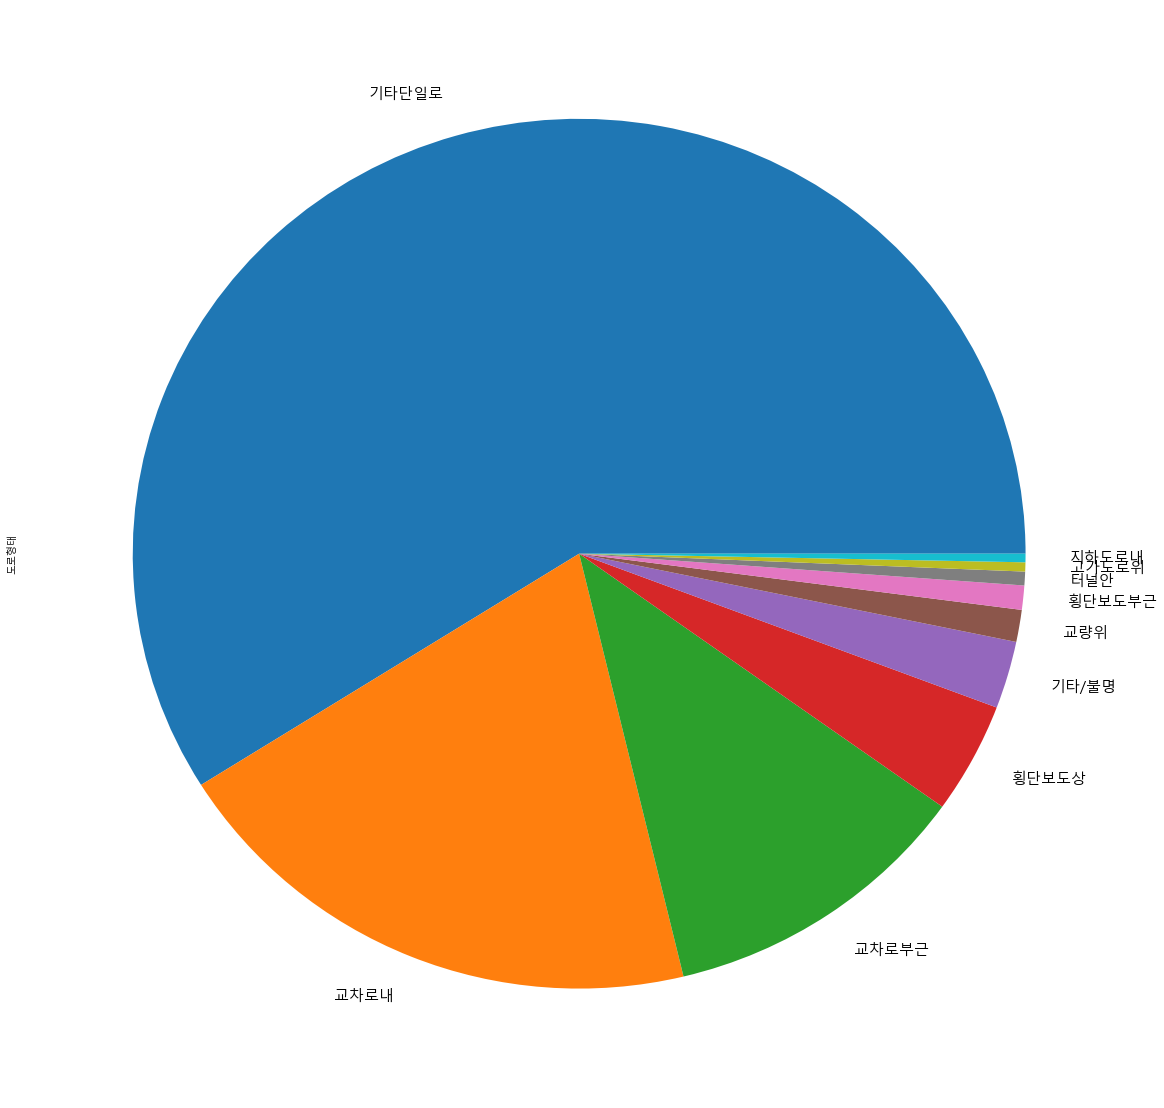

In [31]:
#2016년도 사망교통사고 도로형태 pie 그래프
accident_pie = 도로형태_accident.plot(kind = 'pie', figsize = (20,20) , fontsize = 15, subplots = True )

In [26]:
#2012~2016년도 사망교통사고에서 사고유형별 사망자수 읽기

사고유형_accident=accident_2012_2016.사고유형.value_counts()
사고유형_accident

기타            5602
횡단중           4815
측면직각충돌        3037
공작물충돌         2228
진행중 추돌        1724
전도전복          1433
정면충돌          1427
차도통행중          803
주정차중 추돌        754
도로이탈 추락        445
길가장자리구역통행중     445
보도통행중          260
도로이탈 기타        204
주/정차차량 충돌        9
차단기돌파            2
경보기 무시           1
직전진행             1
Name: 사고유형, dtype: int64

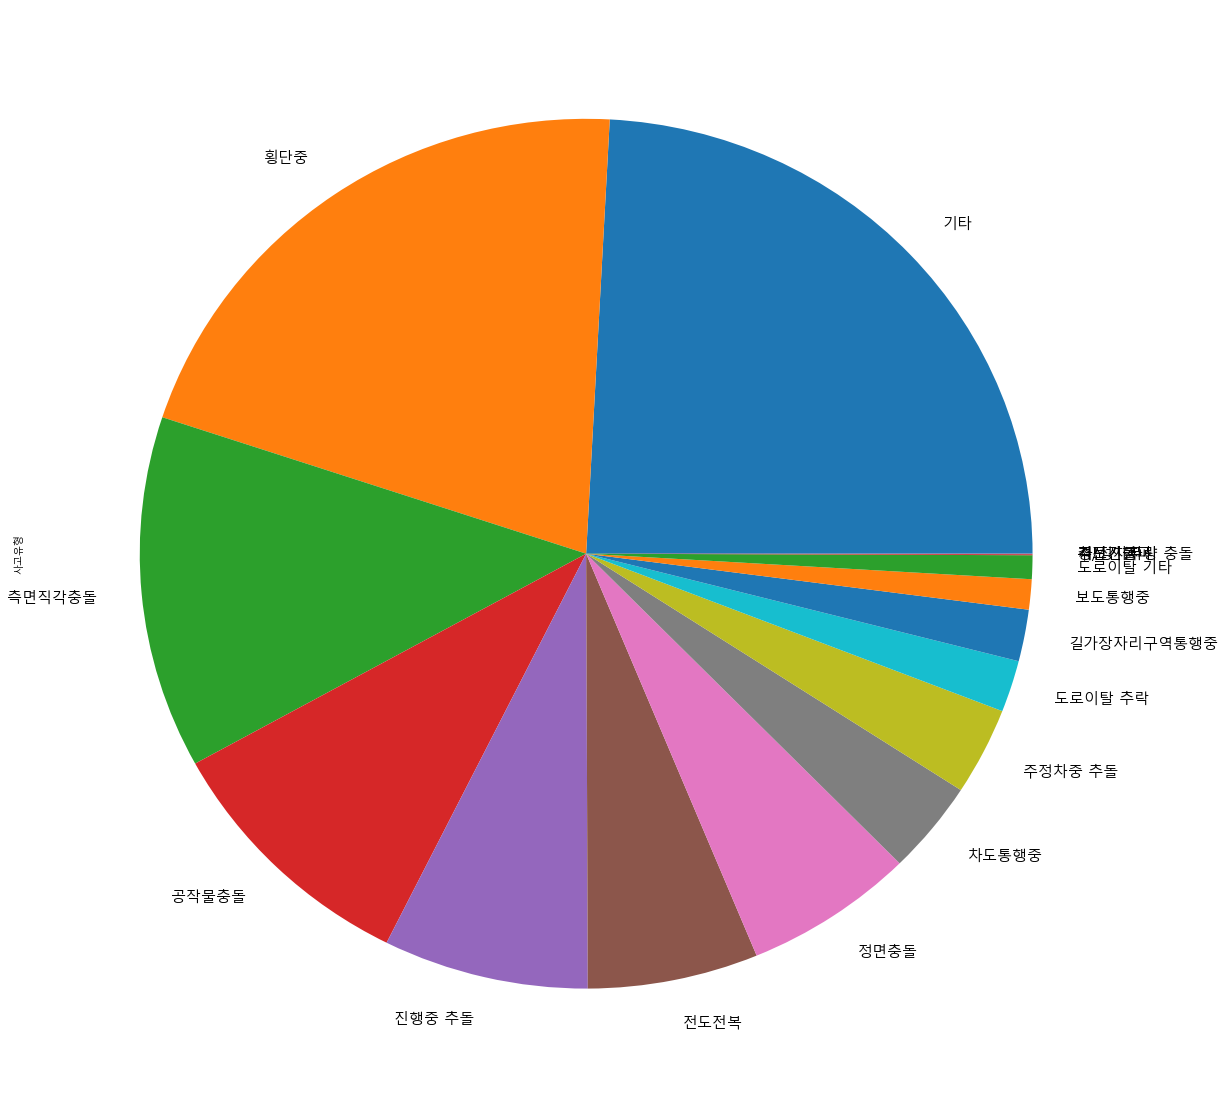

In [27]:
#2016년도 사망교통사고 사고유형 pie 그래프
accident_pie_사고유형 = 사고유형_accident.plot(kind = 'pie', figsize = (20,20) , fontsize = 15, subplots = True )

In [33]:
#2012~2016 사망사고 사건중에서 도로형태의 수에 따라 읽기.

accident_2012_2016.도로형태.value_counts()

기타단일로     13892
교차로내       4319
교차로부근      2582
횡단보도상       974
기타/불명       571
횡단보도부근      294
교량위         283
터널안         133
고가도로위        85
지하도로내        52
건널목           5
Name: 도로형태, dtype: int64

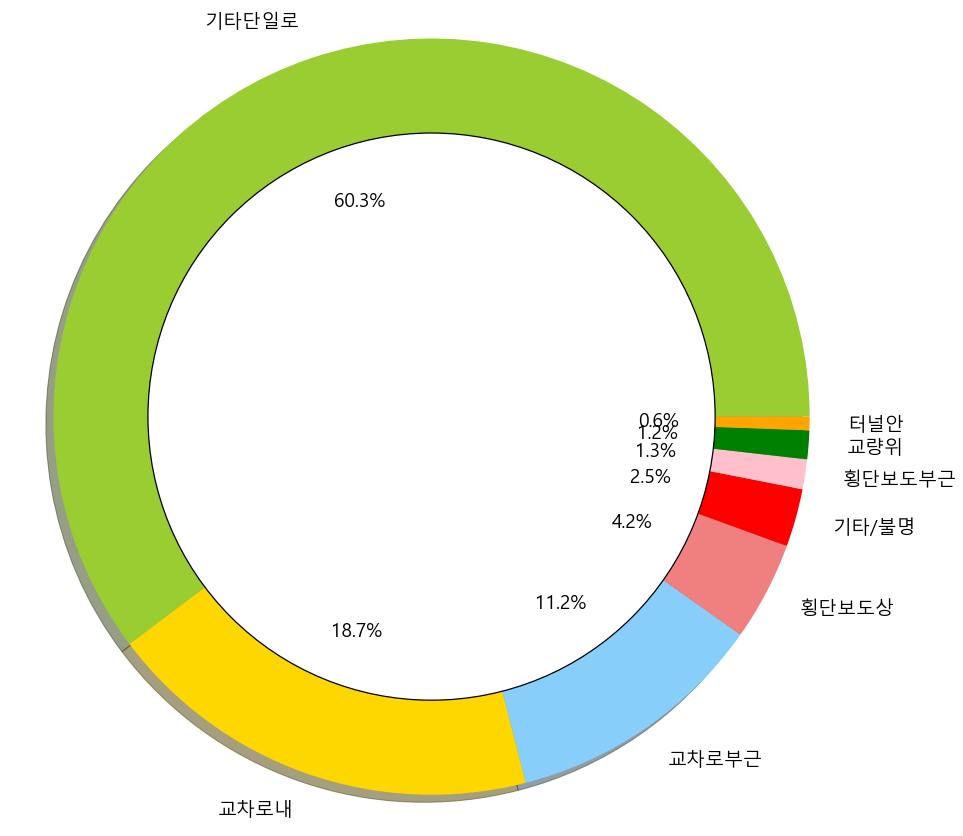

In [34]:
#2012~2016 사망사고 사건중에서 도로형태의 수를 donuts chart로 나타내기

labels = '기타단일로', '교차로내', '교차로부근', '횡단보도상', '기타/불명', '횡단보도부근', '교량위', '터널안' 
sizes = [13892, 4319, 2582, 974, 571, 294, 283, 133]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'pink', 'green', 'orange']
explode = (0, 0, 0, 0, 0, 0, 0, 0) 
plt.figure(figsize=(15,15))
mpl.rcParams['font.size'] = 19.0
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.axis('equal')
plt.show()  

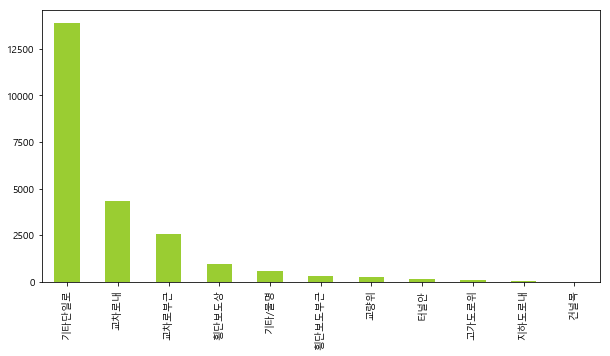

In [35]:
#2012~2016 사망사고 사건중에서 도로형태의 수를 bar chart로 나타내기

도로형태_all_accident =accident_2012_2016.도로형태.value_counts()
all_accident_bar = 도로형태_all_accident.plot(kind = 'bar', figsize = (10,5) , fontsize = 10, color = 'yellowgreen')

In [36]:
#2012~2016사고에서 도로형태가 기타단일로인 경우를 나타냄. 
#사고유형_중분류에서 '기타' 사건에 대해서는 사고유형을 몰라 의미있는 데이터를 뽑아낼 수 없기때문에 제외함.

single_road=accident_2012_2016[accident_2012_2016['도로형태']=='기타단일로']
except_etc=single_road[single_road['사고유형_중분류']!='기타']
except_etc_sort=except_etc.loc[:,['사망자수','사상자수','사고유형_중분류','사고유형_대분류']]
except_etc_sort

,사망자수,사상자수,사고유형_중분류,사고유형_대분류
0,1,1,추돌,차대차
1,1,1,추돌,차대차
2,1,2,측면직각충돌,차대차
3,1,1,추돌,차대차
6,1,2,추돌,차대차
7,1,1,공작물충돌,차량단독
8,1,5,측면직각충돌,차대차
9,1,1,전도전복,차량단독
10,1,5,추돌,차대차
11,1,1,추돌,차대차


In [37]:
# 2012~2016 사고유형 중분류에 대한 사망자수의 평균값

except_etc_sort_mean=except_etc_sort.groupby('사고유형_중분류').mean()
except_etc_sort_mean['반올림']=except_etc_sort_mean['사망자수'].apply(lambda x : round(x,2))
except_etc_sort_mean_사상자수=except_etc_sort_mean.iloc[:,[2]]
except_etc_sort_mean_사상자수.columns=['사망자수']
except_etc_sort_mean_사상자수

,사망자수
사고유형_중분류,
공작물충돌,1.06
길가장자리구역통행중,1.05
도로이탈,1.06
보도통행중,1.02
전도전복,1.05
정면충돌,1.10
주/정차차량 충돌,1.00
차도통행중,1.01
추돌,1.08


In [38]:
#2012~2016 도로형태가 기타단일로이고, 
#사고유형 중분류가 '기타' 사건이 아닐 때를 제외한 사고유형 중분류에 대한 사고수

except_etc_사고=except_etc.사고유형_중분류.value_counts()
except_etc_사고

횡단중           2230
추돌            1801
공작물충돌         1698
전도전복          1127
정면충돌           982
측면직각충돌         970
차도통행중          585
도로이탈           526
길가장자리구역통행중     365
보도통행중          114
주/정차차량 충돌        7
Name: 사고유형_중분류, dtype: int64

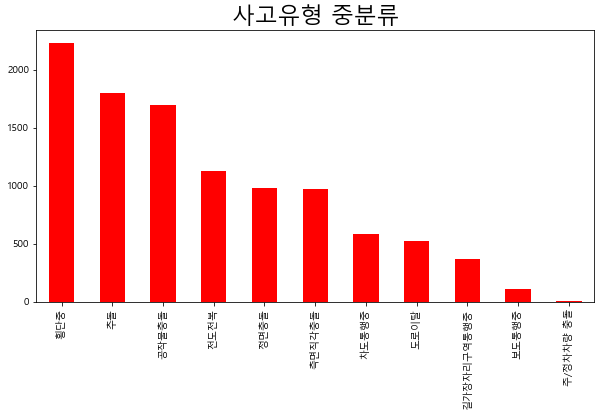

In [39]:
#2012 ~2016 사고유형 중분류에 대한 사상자수의 그래프

유형_bar = except_etc_사고.plot(kind = 'bar', figsize = (10,5) , fontsize = 10, color = 'red', title = '사고유형 중분류')

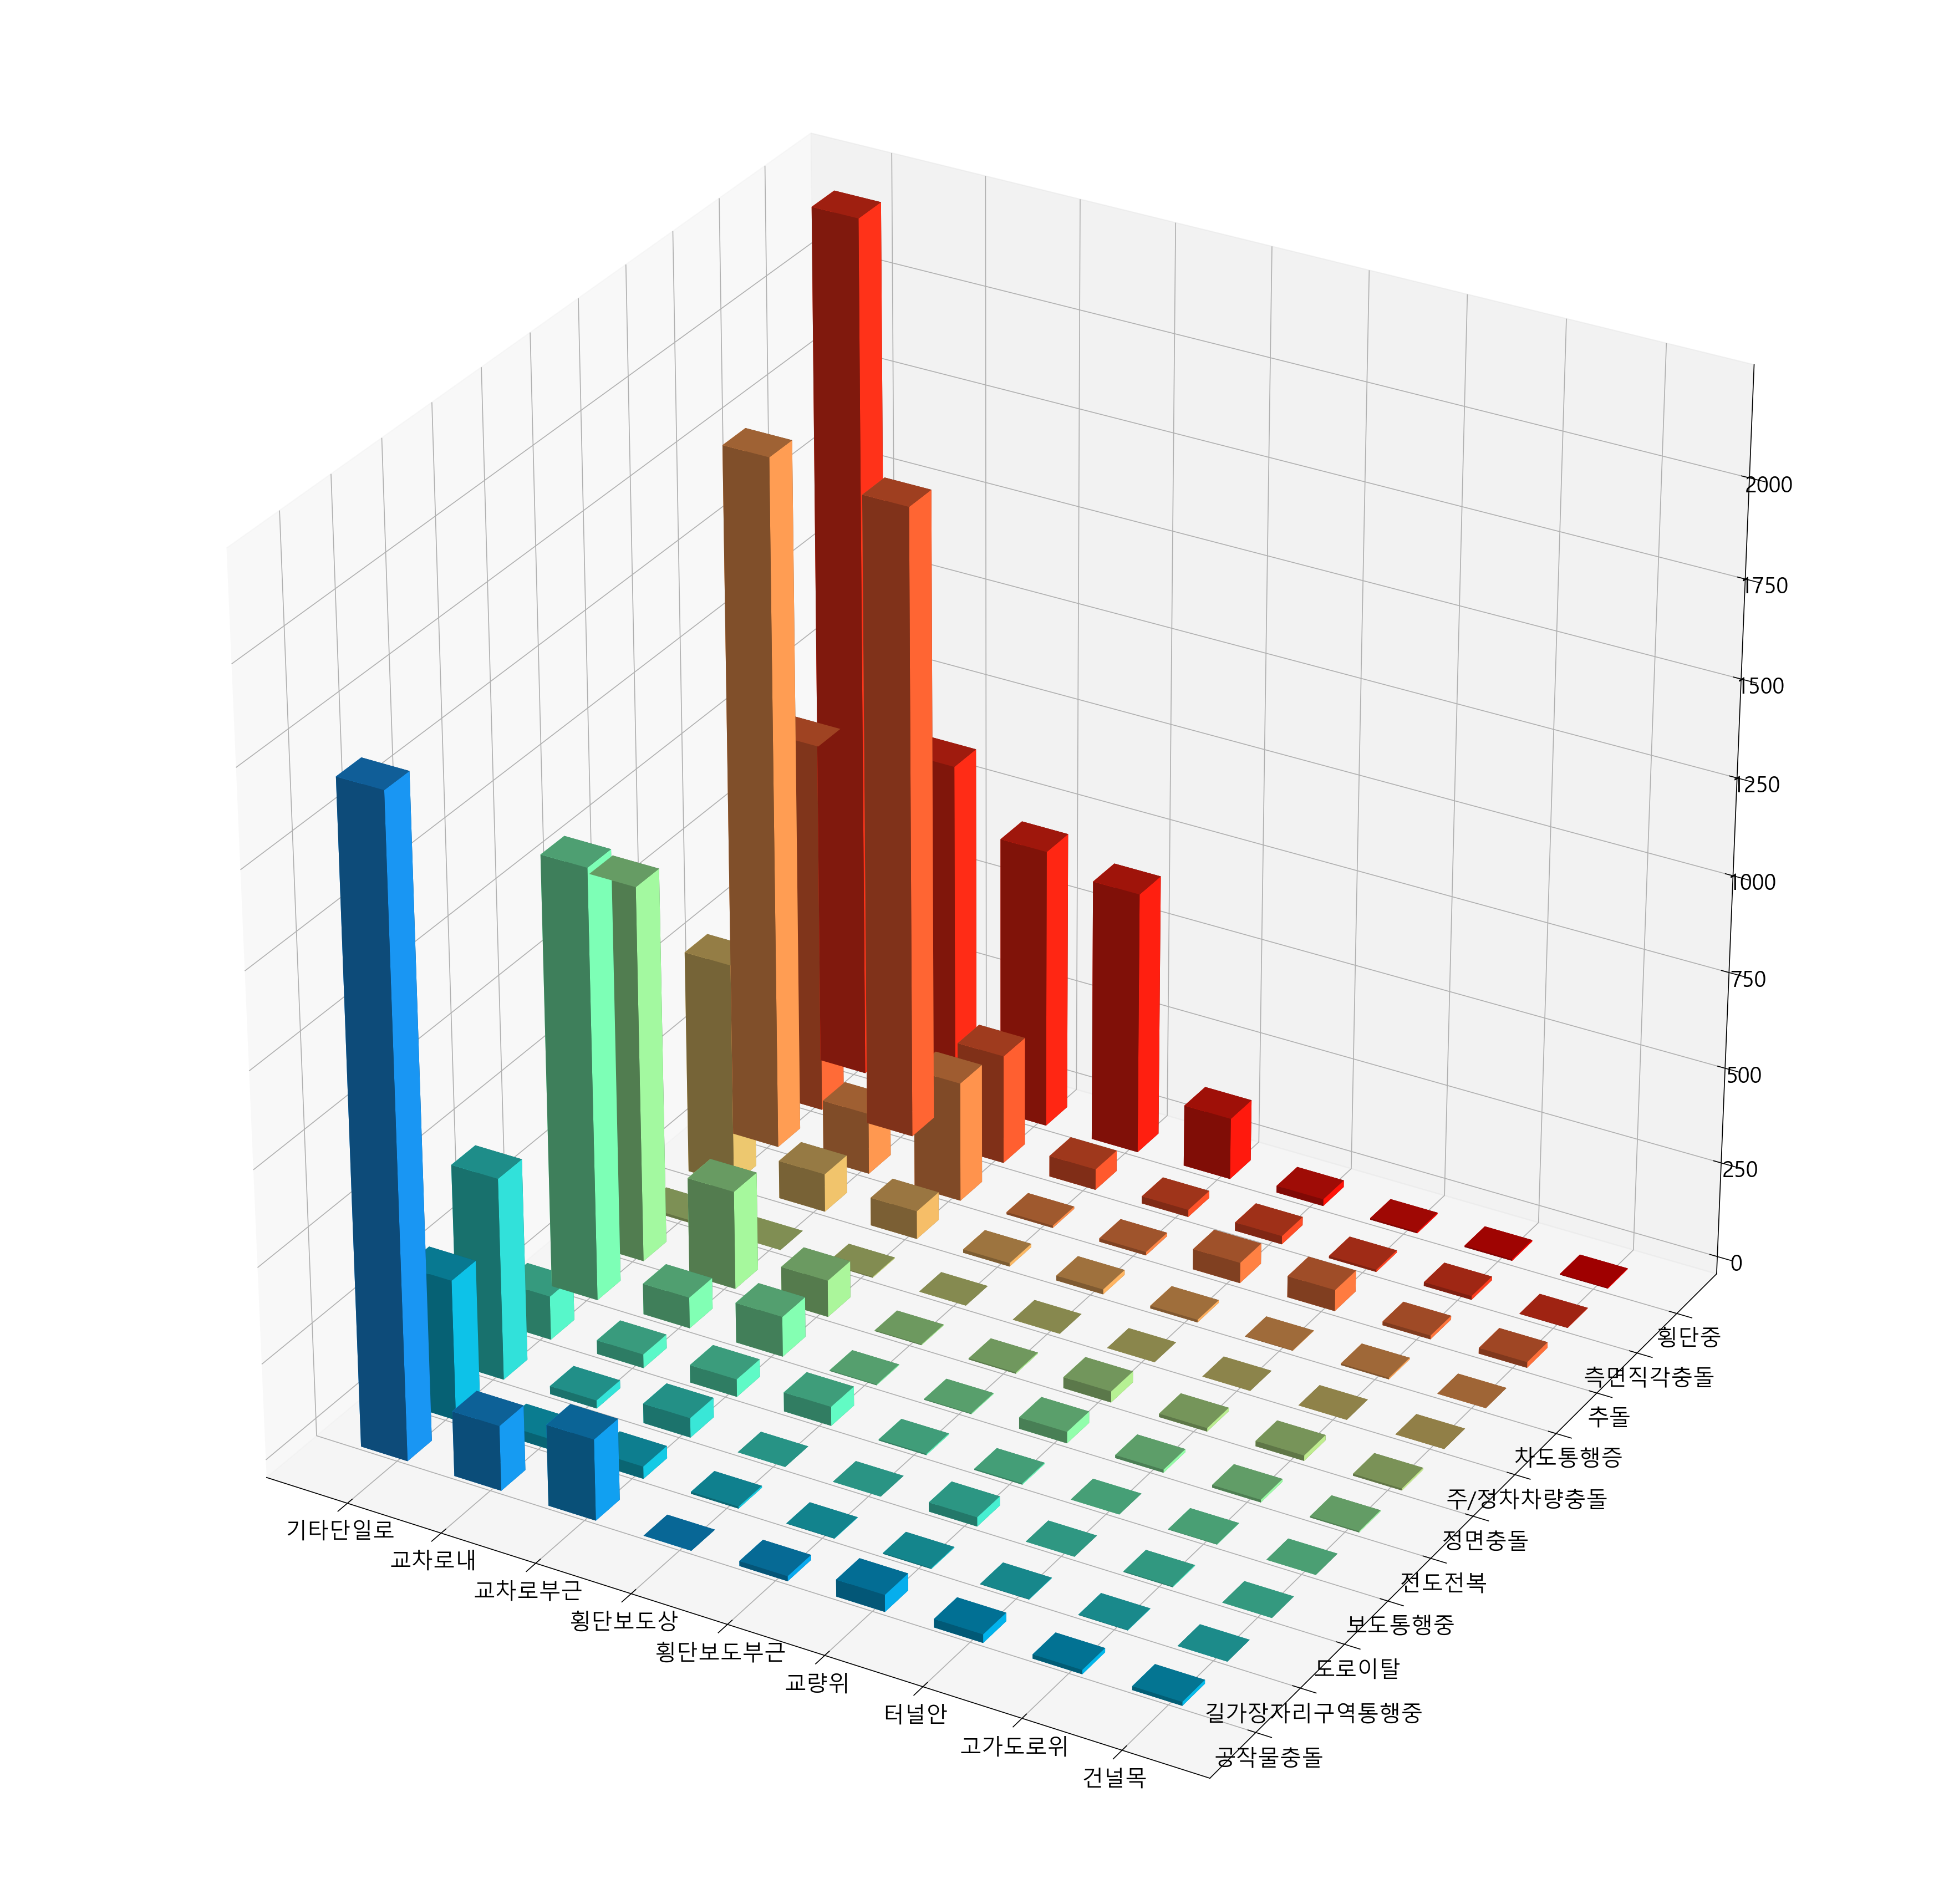

In [40]:
# 2012~2016년 전체교통사고 도로유형과 사고유형을 3차원 plot으로 

nan=0

result=[[[1698.0, 169.0, 211.0, nan, 13.0, 44.0, 22.0, 11.0, 10.0],
 [365.0, 28.0, 32.0, 5.0, 1.0, 2.0, 1.0, 1.0, nan],
 [526.0, 21.0, 51.0, nan, nan, 24.0, nan, 2.0, nan],
 [114.0, 36.0, 46.0, 50.0, 3.0, 3.0, nan, 1.0, nan],
 [1127.0, 81.0, 105.0, 2.0, 2.0, 30.0, 8.0, 7.0, 3.0],
 [982.0, 258.0, 96.0, 2.0, 3.0, 29.0, 9.0, 14.0, 5.0],
 [7.0, nan, 2.0, nan, nan, nan, nan, nan, nan],
 [585.0, 100.0, 74.0, 9.0, 13.0, 7.0, 1.0, 4.0, nan],
 [1801.0, 161.0, 314.0, 6.0, 9.0, 54.0, 56.0, 10.0, 15.0],
 [970.0, 1651.0, 287.0, 55.0, 19.0, 22.0, 6.0, 10.0, 1.0],
 [2230.0, 890.0, 733.0, 689.0, 162.0, 18.0, 4.0, 4.0, 2.0]]]

result = np.array(result, dtype=np.float)

fig=plt.figure(figsize=(30, 30), dpi=150)
ax1=fig.add_subplot(111, projection='3d')

xlabels = np.array(['기타단일로', '교차로내', '교차로부근',
                    '횡단보도상', '횡단보도부근','교량위', '터널안', '고가도로위', '건널목'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['공작물충돌','길가장자리구역통행중','도로이탈','보도통행중','전도전복','정면충돌','주/정차차량충돌', '차도통행증', '추돌', '측면직각충돌', '횡단중'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)

values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
plt.show()

In [41]:
##도로형태와 사고유형을 분석한 결과 횡단중일때와 기타단일로일때가 사건사고가 많이
##난 것을 알 수 있었다. 그래서 사고유형과 도로형태를 엮어서 3차원 그래프를 뽑았다.
## 이를 직접 교통사고가 난 곳을 알아보기 위해 Bubble map과 Dot map을 통해 특정 위치를
## 알아내려했다.

In [28]:
#2016년 사망교통사고 발생위치

position=accident_2016.loc[:,['경도','위도','사망자수']]
position=position[position['경도']>0]
position.head()

,경도,위도,사망자수
0,127.293623,37.387686,1
1,126.889123,37.478777,1
2,127.431592,36.915926,1
3,129.282183,35.742393,1
4,128.118016,35.173512,1


In [29]:
#astype 형변환

position['사망자수']=position['사망자수'].astype(int)
position.사망자수.head()

0    1
1    1
2    1
3    1
4    1
Name: 사망자수, dtype: int32

In [44]:
# 2016년 사망교통사고 buuble map 

bubble_map = folium.Map(location=[36.349637, 127.383316], tiles="Mapbox Bright", zoom_start=8) 
# I can add marker one by one on the map 
for i in range(0,len(position)): 
   folium.Circle( 
      location=[position.iloc[i]['위도'].tolist(), position.iloc[i]['경도'].tolist()], 
      radius=(position.iloc[i]['사망자수']*100).tolist(), 
      color='crimson', 
      fill=True, 
      fill_color='crimson' 
   ).add_to(bubble_map) 

# Save it as html 
bubble_map.save('Team04_2016_accident_bubble_map.html') 


In [45]:
#2012~2016 사망교통사고 bubble map

all_position=accident_2012_2016.loc[:,['경도','위도','사망자수']]
all_position=all_position[all_position['경도']>0]
all_position['사망자수']=all_position['사망자수'].astype(int)
all_position.사망자수
all_bubble_map = folium.Map(location=[36.349637, 127.383316], tiles="Mapbox Bright", zoom_start=7.4) 
nan=0
# I can add marker one by one on the map 
for i in range(0,len(all_position)): 
   folium.Circle( 
      location=[all_position.iloc[i]['위도'].tolist(), all_position.iloc[i]['경도'].tolist()], 
      radius=(all_position.iloc[i]['사망자수']*100).tolist(), 
      color='crimson', 
      fill=True, 
      fill_color='crimson' 
   ).add_to(all_bubble_map) 

# Save it as html 
all_bubble_map.save('Team04_all_death_accident_bubble_map.html') 

In [46]:

d2015=accident_2012_2016[accident_2012_2016['발생년']==2015]
d2014=accident_2012_2016[accident_2012_2016['발생년']==2014]
d2013=accident_2012_2016[accident_2012_2016['발생년']==2013]
d2012=accident_2012_2016[accident_2012_2016['발생년']==2012]

In [47]:
d15=d2015.loc[:,['경도','위도','사망자수']]
d15=d15[d15['경도']>0]
d14=d2014.loc[:,['경도','위도','사망자수']]
d14=d14[d14['경도']>0]
d13=d2013.loc[:,['경도','위도','사망자수']]
d13=d13[d13['경도']>0]
d12=d2012.loc[:,['경도','위도','사망자수']]
d12=d12[d12['경도']>0]

In [48]:
# 2015년 사망교통사고  bubble map

m15 = folium.Map(location=[36.349637, 127.383316], tiles="Mapbox Bright", zoom_start=7.4) 
# I can add marker one by one on the map 
for i in range(0,len(d15)): 
   folium.Circle( 
      location=[d15.iloc[i]['위도'].tolist(), d15.iloc[i]['경도'].tolist()], 
      radius=(d15.iloc[i]['사망자수']*100).tolist(), 
      color='crimson', 
      fill=True, 
      fill_color='crimson' 
   ).add_to(m15) 

# Save it as html 
m15.save('Team04_2015_death_accident_bubble_map.html') 

In [49]:
#큰 도시들 위도 경도 읽기

simple_position=pd.read_csv('simple_position.csv',quotechar=',',encoding='CP949')
simple_position

,시도,위도,경도
0,서울,37.566380,126.977902
1,부산,35.179672,129.075577
2,대구,35.871269,128.601734
3,인천,37.455791,126.705401
4,광주,35.160015,126.851329
5,대전,36.349637,127.383316
6,울산,35.538756,129.311327
7,세종,36.480862,127.290757
8,경기,37.263201,127.028574
9,강원,37.881671,127.732695


In [50]:
#2016 사고수와 위도 경도를 묶음

death_2016=pd.merge(simple_position,all_accident_2016_합계_발생건수_3,on='시도')
death_2016.columns=['시도','위도','경도','사고수']
death_2016

,시도,위도,경도,사고수
0,서울,37.566380,126.977902,40039
1,부산,35.179672,129.075577,12192
2,대구,35.871269,128.601734,13098
3,인천,37.455791,126.705401,8535
4,광주,35.160015,126.851329,7354
5,대전,36.349637,127.383316,7535
6,울산,35.538756,129.311327,4496
7,세종,36.480862,127.290757,521
8,경기,37.263201,127.028574,51013
9,강원,37.881671,127.732695,8841


In [51]:
#2016 교통사고수와 위도 경도를 묶음

all_2016_acc=pd.merge(simple_position,all_accident_2016_합계_발생건수_3,on='시도')
all_2016_acc.columns=['시도','위도','경도','사고수']
all_2016_acc

,시도,위도,경도,사고수
0,서울,37.566380,126.977902,40039
1,부산,35.179672,129.075577,12192
2,대구,35.871269,128.601734,13098
3,인천,37.455791,126.705401,8535
4,광주,35.160015,126.851329,7354
5,대전,36.349637,127.383316,7535
6,울산,35.538756,129.311327,4496
7,세종,36.480862,127.290757,521
8,경기,37.263201,127.028574,51013
9,강원,37.881671,127.732695,8841


In [52]:
all_2016_acc['사고수'] = all_2016_acc['사고수'].astype(int)
all_2016_acc.사고수

0     40039
1     12192
2     13098
3      8535
4      7354
5      7535
6      4496
7       521
8     51013
9      8841
10     9392
11     8962
12     7850
13     9504
14    14629
15    12522
16     4434
Name: 사고수, dtype: int32

In [53]:
death_2016['사고수'] = death_2016['사고수'].astype(int)
death_2016.사고수

0     40039
1     12192
2     13098
3      8535
4      7354
5      7535
6      4496
7       521
8     51013
9      8841
10     9392
11     8962
12     7850
13     9504
14    14629
15    12522
16     4434
Name: 사고수, dtype: int32

In [54]:
# 2016년도 사망교통사고와 교통사고의 bubblemap
m = folium.Map(location=[36.349637, 127.383316], tiles="Mapbox Bright", zoom_start=7.4) 

# I can add marker one by one on the map 
for i in range(0,len(all_2016_acc)): 
   folium.Circle( 
      location=[all_2016_acc.iloc[i]['위도'].tolist(), all_2016_acc.iloc[i]['경도'].tolist()], 
      popup=all_2016_acc.iloc[i]['시도'], 
      radius=(all_2016_acc.iloc[i]['사고수']*0.5).tolist(), 
      color='chartreuse', 
      fill=True, 
      fill_color='chartreuse' 
   ).add_to(m) 
# I can add marker one by one on the map 
for i in range(0,len(death_2016)): 
   folium.Circle( 
      location=[death_2016.iloc[i]['위도'].tolist(), death_2016.iloc[i]['경도'].tolist()], 
      popup=death_2016.iloc[i]['시도'], 
      radius=(death_2016.iloc[i]['사고수']*3).tolist(), 
      color='crimson', 
      fill=True, 
      fill_color='crimson' 
   ).add_to(m) 

# Save it as html 
m.save('Team04_2016_death_accident_+_all_accident.html') 

In [55]:
#2016년의 사망교통사고수 bubble map
m1 = folium.Map(location=[36.349637, 127.383316], tiles="Mapbox Bright", zoom_start=7.4) 
for i in range(0,len(death_2016)): 
   folium.Circle( 
      location=[death_2016.iloc[i]['위도'].tolist(), death_2016.iloc[i]['경도'].tolist()], 
      popup=death_2016.iloc[i]['시도'], 
      radius=(death_2016.iloc[i]['사고수']*0.5).tolist(), 
      color='crimson', 
      fill=True, 
      fill_color='crimson' 
   ).add_to(m1) 

# Save it as html 
m1.save('Team04_death_2016_accident.html')

In [56]:
a=accident_2012_2016[accident_2012_2016['사고유형']=='횡단중']
agca=a.loc[:,['경도','위도','사망자수']]
agca.head()
agca['사망자수']=agca['사망자수'].astype(int)
agca.사망자수
# Make an empty map 
mm = folium.Map(location=[36.349637, 127.383316], tiles="Mapbox Bright", zoom_start=7.4) 
# I can add marker one by one on the map 
for i in range(0,len(agca)): 
   folium.Circle( 
      location=[agca.iloc[i]['위도'].tolist(), agca.iloc[i]['경도'].tolist()], 
      radius=(agca.iloc[i]['사망자수']*100).tolist(), 
      popup=str(agca.iloc[i][['위도','경도']]),
      color='crimson', 
      fill=True, 
      fill_color='crimson' 
   ).add_to(mm) 

# Save it as html 
mm.save('Team04_횡단.html') 
